# 🐍 NYC High School Directory Exploration

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

## ✅ Instructions:

### 1. Download the dataset from the `day_2_datasets` folder.

In [142]:
# download the dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("new-york-city/nyc-high-school-directory")

print("Path to dataset files:", path)

Path to dataset files: /Users/zeal.v/.cache/kagglehub/datasets/new-york-city/nyc-high-school-directory/versions/7


In [143]:
import os

# List all files in the dataset directory to find the correct CSV file
print("Files in dataset directory:")
print(os.listdir(path))

Files in dataset directory:
['doe-high-school-directory-2013-2014.csv', 'DOE_High_Shool_Directory_2013-2014.xlsx', 'Archived_DOE_High_School_Directory_2014-2015.csv', '2016-doe-high-school-directory.csv', 'socrata_metadata_2016-doe-high-school-directory.json', 'socrata_metadata_doe-high-school-directory-2013-2014.json', 'socrata_metadata_2014-2015-doe-high-school-directory.json', 'doe hsdirectory school column description.csv', '2017-doe-high-school-directory.csv', 'socrata_metadata_2017-doe-high-school-directory.json', '2016_DOE_High_School_Directory.xlsx', '2014-2015_DOE_High_Shool_Directory.xlsx', 'Archived_DOE_High_School_Directory_2016.csv', '2014-2015-doe-high-school-directory.csv', '2017_DOE_High_School_Directory.xlsx']


### 2. Open a new Jupyter Notebook and:

#### - Load the dataset using pandas

In [144]:
# Load the dataset
df = pd.read_csv(os.path.join(path, "2014-2015-doe-high-school-directory.csv"))

# Display the first few rows of the DataFrame
print(f"First few rows of the DataFrame:\n{df.head()}")

First few rows of the DataFrame:
      dbn                                        school_name    borough  \
0  27Q260          Frederick Douglass Academy VI High School     Queens   
1  21K559        Life Academy High School for Film and Music   Brooklyn   
2  16K393     Frederick Douglass Academy IV Secondary School   Brooklyn   
3  08X305                               Pablo Neruda Academy      Bronx   
4  03M485  Fiorello H. LaGuardia High School of Music & A...  Manhattan   

  building_code  phone_number    fax_number  grade_span_min  grade_span_max  \
0          Q465  718-471-2154  718-471-2890             9.0              12   
1          K400  718-333-7750  718-333-7775             9.0              12   
2          K026  718-574-2820  718-574-2821             9.0              12   
3          X450  718-824-1682  718-824-1663             9.0              12   
4          M485  212-496-0700  212-724-5748             9.0              12   

   expgrade_span_min  expgrade_span_max  

In [145]:
# Display the shape of the DataFrame
print(f"Shape of the DataFrame: {df.shape}")

Shape of the DataFrame: (435, 69)


#### - Clean the column names (make lowercase, replace spaces with _, remove special characters)

In [146]:
# Display the columns of the DataFrame
print(f"Columns in the DataFrame:\n{df.columns.tolist()}")

Columns in the DataFrame:
['dbn', 'school_name', 'borough', 'building_code', 'phone_number', 'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min', 'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city', 'state_code', 'postcode', 'website', 'total_students', 'campus_name', 'school_type', 'overview_paragraph', 'program_highlights', 'language_classes', 'advancedplacement_courses', 'online_ap_courses', 'online_language_courses', 'extracurricular_activities', 'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed', 'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered', 'partner_cultural', 'partner_nonprofit', 'partner_corporate', 'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2', 'start_time', 'end_time', 'se_services', 'ell_programs', 'school_accessibility_description', 'number_programs', 'priority01', 'priority02', 'priority03', 'priority04', 'priority05', 'priority06', 'priority07', 'priority08', 'priority09', 'priori

In [147]:
# Clean the column names (make lowercase, replace spaces with _, remove special characters)
df.columns = (
    df.columns.str.lower()
    .str.replace(" ", "_")
    .str.replace("[^a-zA-Z0-9_]", "", regex=True)
)
# Display the cleaned column names
print(f"Cleaned column names:\n{df.columns.tolist()}")

Cleaned column names:
['dbn', 'school_name', 'borough', 'building_code', 'phone_number', 'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min', 'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city', 'state_code', 'postcode', 'website', 'total_students', 'campus_name', 'school_type', 'overview_paragraph', 'program_highlights', 'language_classes', 'advancedplacement_courses', 'online_ap_courses', 'online_language_courses', 'extracurricular_activities', 'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed', 'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered', 'partner_cultural', 'partner_nonprofit', 'partner_corporate', 'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2', 'start_time', 'end_time', 'se_services', 'ell_programs', 'school_accessibility_description', 'number_programs', 'priority01', 'priority02', 'priority03', 'priority04', 'priority05', 'priority06', 'priority07', 'priority08', 'priority09', 'priority10

In [148]:
# Display the data types of the columns
print(f"Data types of the columns:\n{df.dtypes}")

Data types of the columns:
dbn                        object
school_name                object
borough                    object
building_code              object
phone_number               object
                           ...   
zip_codes                 float64
community_districts         int64
borough_boundaries          int64
city_council_districts      int64
police_precincts            int64
Length: 69, dtype: object


In [149]:
# Display summary statistics of the DataFrame
print(f"Summary statistics of the DataFrame:\n{df.describe()}")

Summary statistics of the DataFrame:
       grade_span_min  grade_span_max  expgrade_span_min  expgrade_span_max  \
count      432.000000      435.000000          31.000000          33.000000   
mean         8.442130       11.894253           8.516129          12.363636   
std          1.164591        0.421583           1.121635           0.783349   
min          6.000000        9.000000           6.000000          12.000000   
25%          9.000000       12.000000           9.000000          12.000000   
50%          9.000000       12.000000           9.000000          12.000000   
75%          9.000000       12.000000           9.000000          12.000000   
max          9.000000       12.000000           9.000000          14.000000   

           postcode  total_students  number_programs  community_board  \
count    435.000000      426.000000       435.000000       432.000000   
mean   10726.096552      703.842723         1.708046         6.787037   
std      537.927907      775.870

### 3. Filter the dataset to include only schools located in Brooklyn

In [150]:
# Filter the dataset to include only schools located in Brooklyn
brooklyn_schools = df[df["borough"] == "Brooklyn"]
brooklyn_schools.head(2)

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52


### 4. Answer the following:

#### - How many total schools are in Brooklyn?

In [151]:
# How many total schools are in Brooklyn?
total_brooklyn_schools = len(brooklyn_schools)
print(f"Total schools in Brooklyn: {total_brooklyn_schools}")

Total schools in Brooklyn: 121


#### - How many Brooklyn schools offer Grade 9 entry?

In [152]:
# How many Brooklyn schools offer Grade 9 entry?
grade_9_entry_schools = brooklyn_schools[brooklyn_schools["grade_span_min"] <= 9]
total_grade_9_entry_schools = len(grade_9_entry_schools)
print(
    f"Total schools in Brooklyn offering Grade 9 entry: {total_grade_9_entry_schools}"
)

Total schools in Brooklyn offering Grade 9 entry: 121


### 5. Group and summarize:



#### - Count of schools per borough

In [153]:
# Count of schools per borough
borough_counts = df["borough"].value_counts()
print(f"Count of schools per borough:\n{borough_counts}")

Count of schools per borough:
borough
Brooklyn         121
Bronx            118
Manhattan        106
Queens            80
Staten Island     10
Name: count, dtype: int64


In [154]:
df["borough"].isnull().sum()

0

#### - Average number of students per borough

In [155]:
# Average number of students per borough
average_students_per_borough = df.groupby("borough")["total_students"].mean()
print(f"Average number of students per borough:\n{average_students_per_borough}")

Average number of students per borough:
borough
Bronx             490.406780
Brooklyn          699.134454
Manhattan         589.825243
Queens           1046.644737
Staten Island    1847.500000
Name: total_students, dtype: float64


#### - Summary of grade_span_max grouped by borough

In [156]:
# Summary of grade_span_max grouped by borough
grade_span_max_summary = df.groupby("borough")["grade_span_max"].describe()
print(f"Summary of grade_span_max grouped by borough:\n{grade_span_max_summary}")

Summary of grade_span_max grouped by borough:
               count       mean       std   min   25%   50%   75%   max
borough                                                                
Bronx          118.0  11.906780  0.369506   9.0  12.0  12.0  12.0  12.0
Brooklyn       121.0  11.933884  0.381566   9.0  12.0  12.0  12.0  12.0
Manhattan      106.0  11.877358  0.472135   9.0  12.0  12.0  12.0  12.0
Queens          80.0  11.825000  0.497462  10.0  12.0  12.0  12.0  12.0
Staten Island   10.0  12.000000  0.000000  12.0  12.0  12.0  12.0  12.0


### 6. Create visualizations:

#### - Bar chart: Number of schools per borough

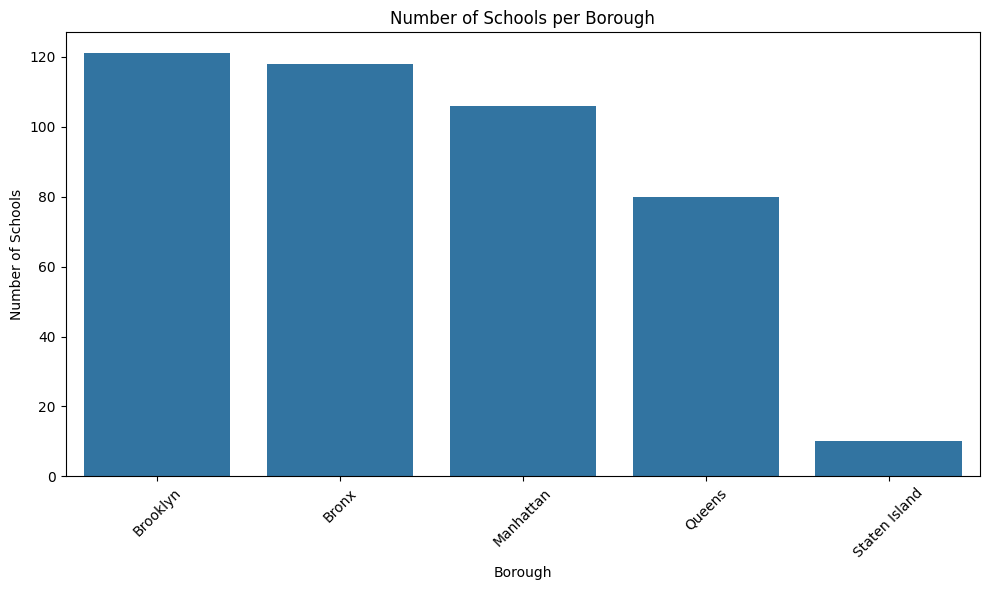

In [157]:
# Visualize the number of schools per borough
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="borough", order=df["borough"].value_counts().index)
plt.title("Number of Schools per Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Schools")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:** 

- This bar chart not only shows the number of high schools in each borough, but it can also hint at population differences. Boroughs with more schools often have more residents, especially school-age children. So, if Brooklyn and the Bronx have the most schools, it suggests these areas may have larger populations or higher demand for high school education compared to boroughs like Staten Island. Or something else...

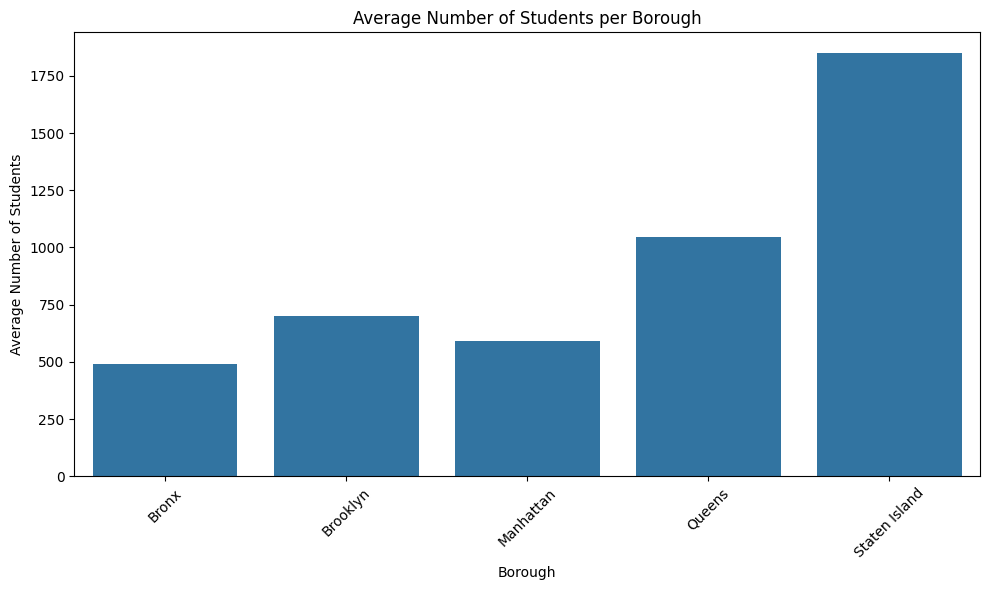

In [158]:
# Number of students per borough
plt.figure(figsize=(10, 6))
sns.barplot(x=average_students_per_borough.index, y=average_students_per_borough.values)
plt.title("Average Number of Students per Borough")
plt.xlabel("Borough")
plt.ylabel("Average Number of Students")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

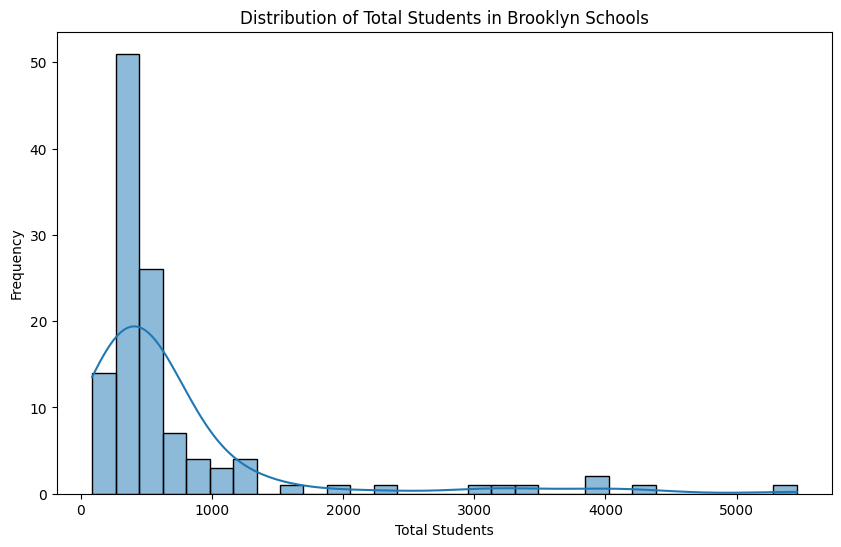

In [159]:
# Visualize the distribution of total students in Brooklyn schools
plt.figure(figsize=(10, 6))
sns.histplot(brooklyn_schools["total_students"], bins=30, kde=True)
plt.title("Distribution of Total Students in Brooklyn Schools")
plt.xlabel("Total Students")
plt.ylabel("Frequency")
plt.show()

**Insight:**
- This chart shows how many students go to each Brooklyn high school. Most schools have a similar number of students, but there are a few that are much bigger or smaller than the rest. This helps you see if most schools are about the same size or if there are some very large or very small schools in Brooklyn.

#### Correlation Heatmap of Numeric Features
A heatmap of correlations between numeric columns can reveal interesting relationships in the data.

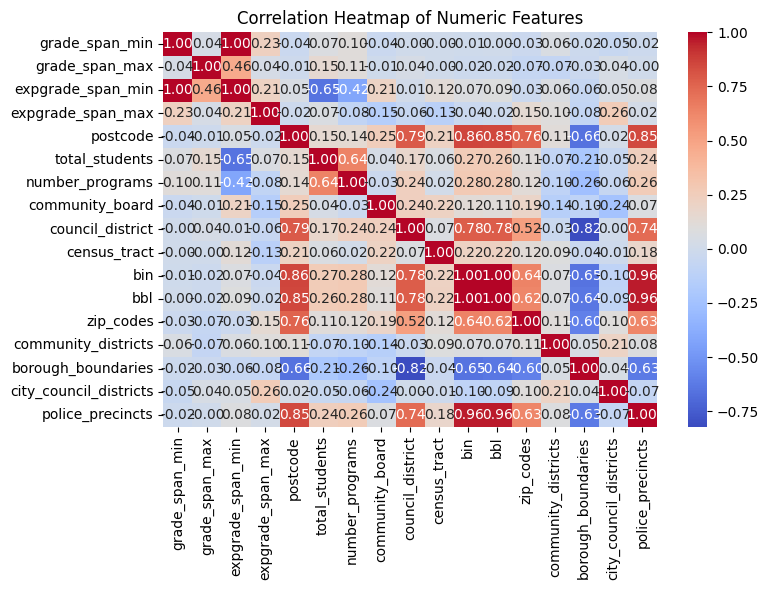

In [160]:
# Correlation heatmap of numeric columns
plt.figure(figsize=(8, 6))
numeric_cols = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

**Insight:**

- The correlation matrix shows that `grade_span_min` and `expgrade_span_min` are perfectly correlated (correlation = 1.0), meaning these columns contain the same or very similar information.
- `total_students` has a strong negative correlation with `expgrade_span_min` (-0.65), suggesting that schools with a lower expected grade span minimum tend to have more students.
- `grade_span_max` and `expgrade_span_min` are moderately correlated (0.46), indicating some relationship between the maximum grade span and the expected minimum grade.
- Most other features, such as location-based columns (`postcode`, `community_board`, etc.), show very weak or no correlation with student counts or grade spans.
- There are no strong positive or negative correlations between `total_students` and most other numeric features, except for the negative relationship with `expgrade_span_min`.

Overall, the heatmap suggests that grade span variables are closely related to each other, and the number of students is mostly independent of location-based features but is influenced by the grade span structure of the school.

In [167]:
# Correlation matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
print(f"Correlation matrix of numeric columns:\n{correlation_matrix}")

Correlation matrix of numeric columns:
                        grade_span_min  grade_span_max  expgrade_span_min  \
grade_span_min                1.000000        0.037384           1.000000   
grade_span_max                0.037384        1.000000           0.461496   
expgrade_span_min             1.000000        0.461496           1.000000   
expgrade_span_max             0.230769        0.038815           0.214834   
postcode                     -0.037674       -0.010339           0.052931   
total_students                0.074174        0.146688          -0.650435   
number_programs               0.104469        0.110307          -0.416333   
community_board              -0.037348       -0.008193           0.207780   
council_district             -0.001030        0.037141           0.010876   
census_tract                 -0.000609       -0.001172           0.121137   
bin                          -0.005732       -0.023472           0.068749   
bbl                           0.00168

**Insight:**
- The minimum and expected minimum grade span are perfectly correlated (correlation = 1.00), meaning they always move together.
- The total number of students is moderately negatively correlated with the expected minimum grade span (-0.65), so schools with a higher expected minimum grade tend to have fewer students.
- The number of programs offered is also negatively correlated with the expected minimum grade span (-0.42), suggesting schools starting at higher grades may offer fewer programs.
- Borough boundaries and community districts are strongly negatively correlated (-0.63), reflecting how these administrative boundaries are defined in NYC.
- Most other correlations between numeric features are weak, showing little linear relationship between them.

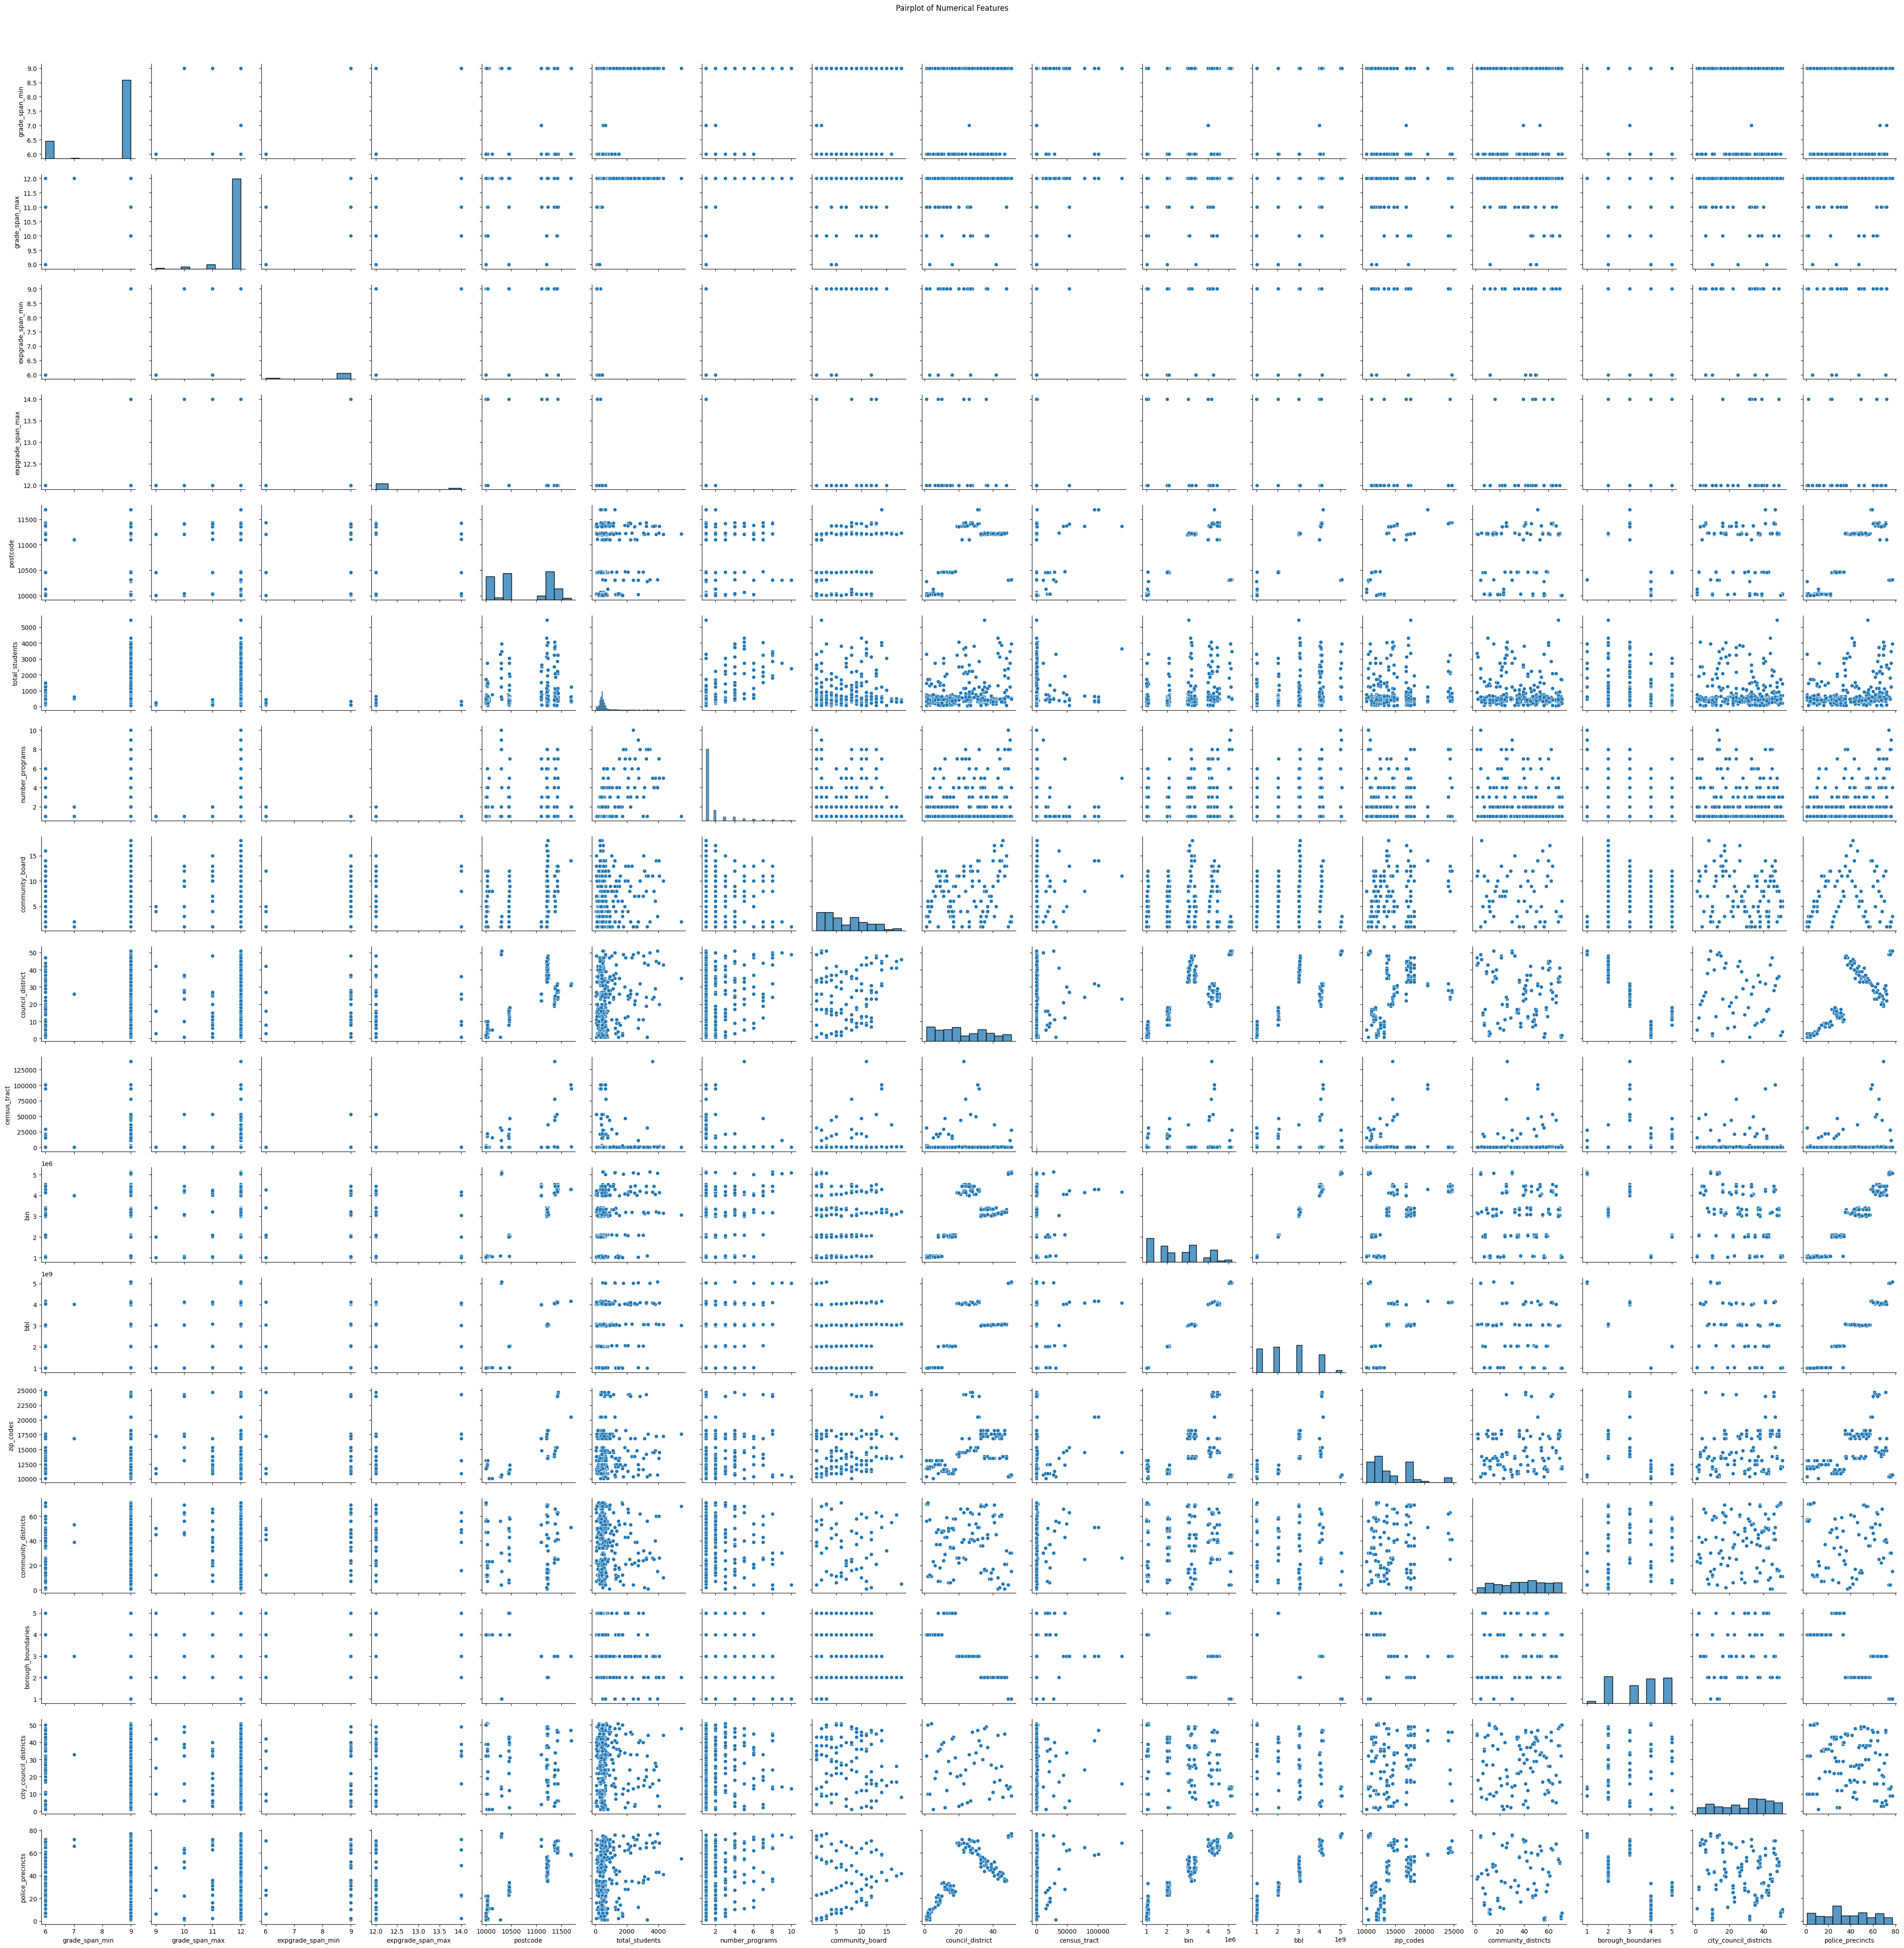

In [162]:
# pairplot of numerical features
sns.pairplot(df.select_dtypes(include=["float64", "int64"]))
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()

/var/folders/9l/hrrtsvvx7_v1n1nd2s2h8k4r0000gn/T/ipykernel_23191/11049371.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette="Blues_d")


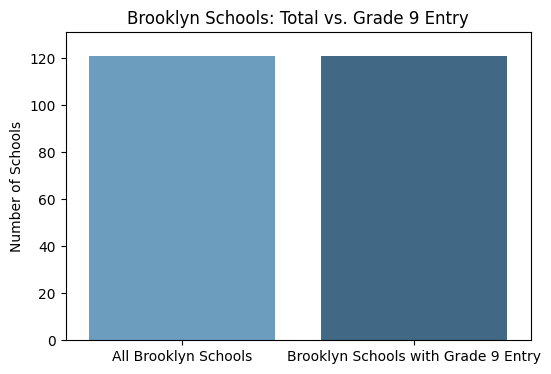

In [168]:
# The number of Brooklyn schools vs. those offering Grade 9 entry
counts = [len(brooklyn_schools), total_grade_9_entry_schools]
labels = ["All Brooklyn Schools", "Brooklyn Schools with Grade 9 Entry"]

plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=counts, palette="Blues_d")
plt.title("Brooklyn Schools: Total vs. Grade 9 Entry")
plt.ylabel("Number of Schools")
plt.ylim(0, max(counts) + 10)
plt.show()

**Insight:**  
The chart shows that almost every Brooklyn high school lets students start in Grade 9. The two bars are nearly the same height, so if you want to begin high school in Grade 9 in Brooklyn, you have lots of options. This is good news for families and students because it means most schools are open to new students at this grade.

### 7. Brainstorm Insights from the NYC High School Directory Analysis

- **Borough Distribution:** Brooklyn and the Bronx have the highest number of high schools, suggesting these boroughs have larger populations or higher demand for high school education. Staten Island has the fewest schools.

- **Brooklyn Schools:** Nearly all Brooklyn high schools offer Grade 9 entry, giving students and families many options to start high school at this grade.

- **Student Population:** Most Brooklyn high schools have a similar number of students, but there are a few much larger or smaller schools. This shows that while most schools are average-sized, there is some variety in school size.

- **Average Students per Borough:** The average number of students per school varies by borough, with some boroughs having larger schools on average than others.

- **Grade Span and Programs:** Schools with a higher expected minimum grade tend to have fewer students and offer fewer programs. The minimum and expected minimum grade span are perfectly correlated, meaning they always move together.

- **Correlations:** Most numeric features in the dataset are only weakly related to each other. The strongest relationships are between grade span variables and between borough boundaries and community districts.

- **Overall:** The data shows that school size, grade span, and program offerings are related, but location-based features like borough or community district have little effect on student numbers or grade spans.